In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [247]:
data = pd.read_excel('C:/Users/Arasu/OneDrive/Documents/Portfolio project- Insurance cost prediction.xlsx')

#Observation of given data

In [249]:
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [250]:
data.shape

(986, 11)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [252]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

Visualization

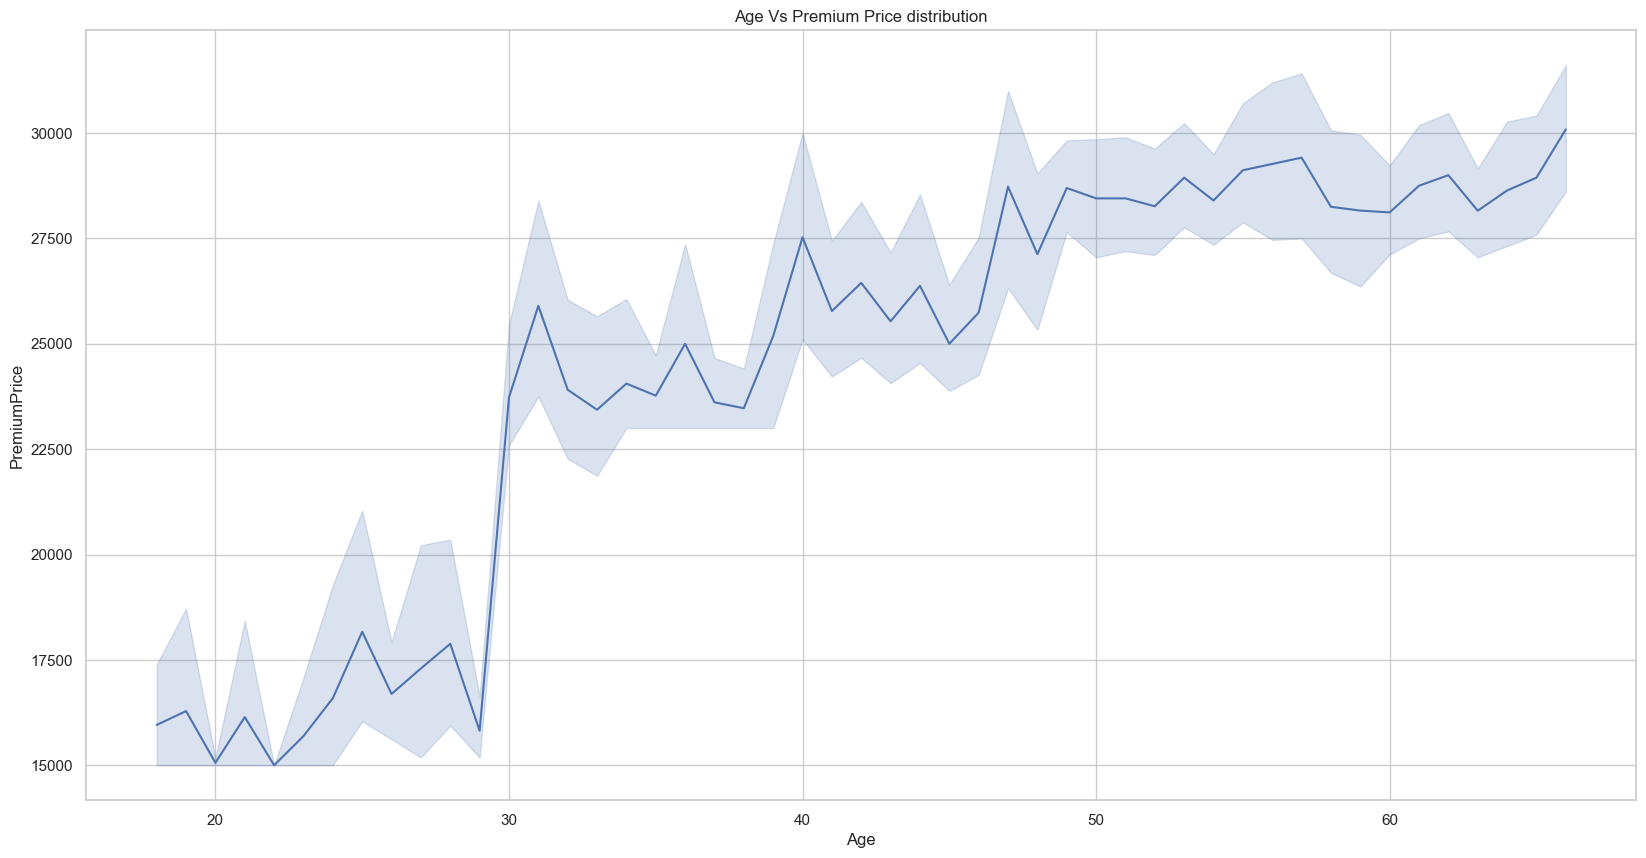

In [254]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.lineplot(x="Age", y= "PremiumPrice", data=data)
plt.title("Age Vs Premium Price distribution")
plt.show()

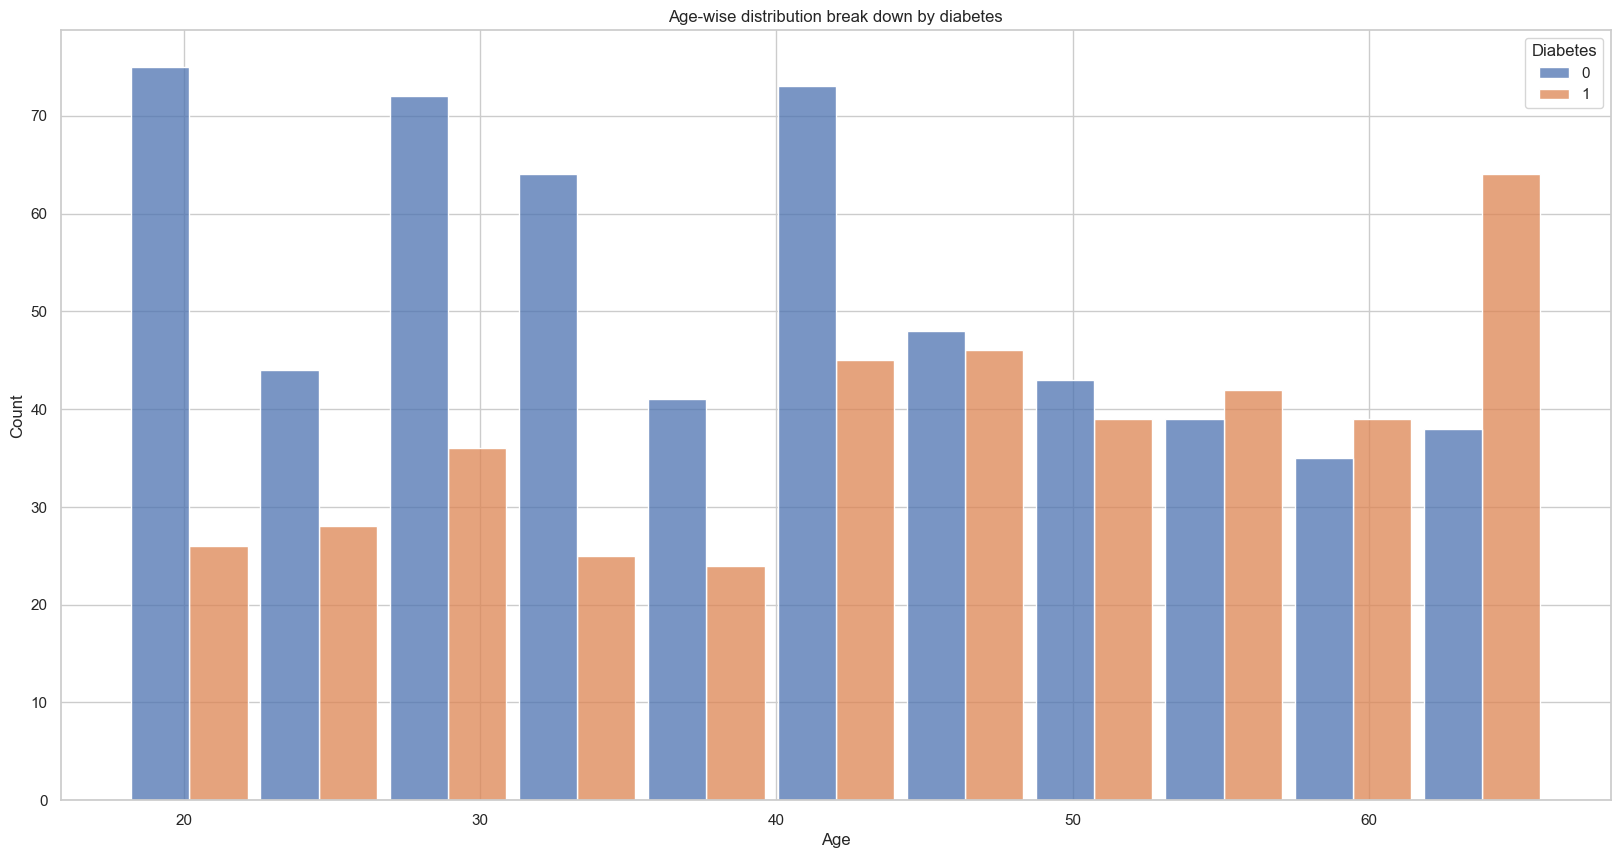

In [255]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.histplot(data=data, x="Age", hue="Diabetes", multiple="dodge", shrink=.9 )
plt.title("Age-wise distribution break down by diabetes")
plt.show()

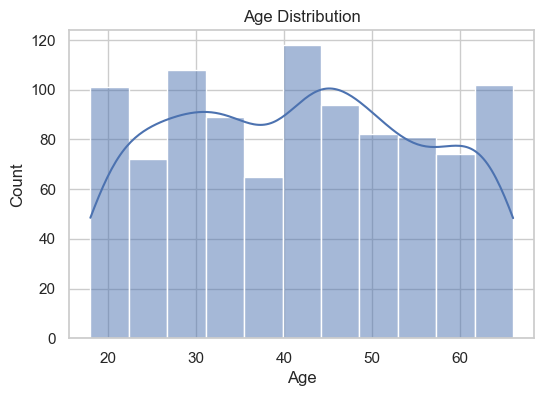

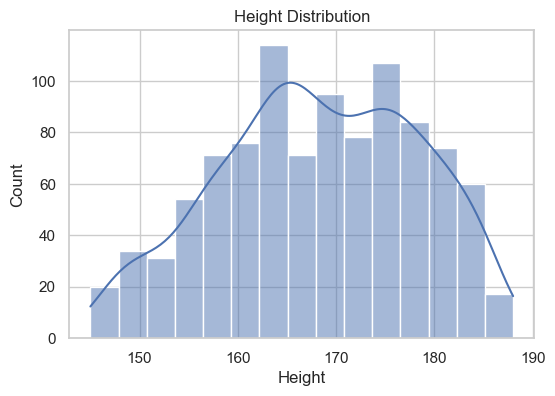

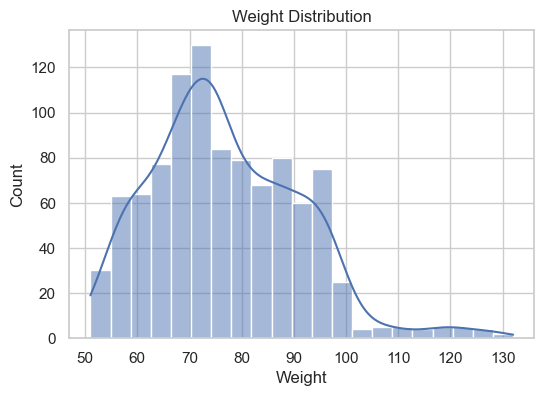

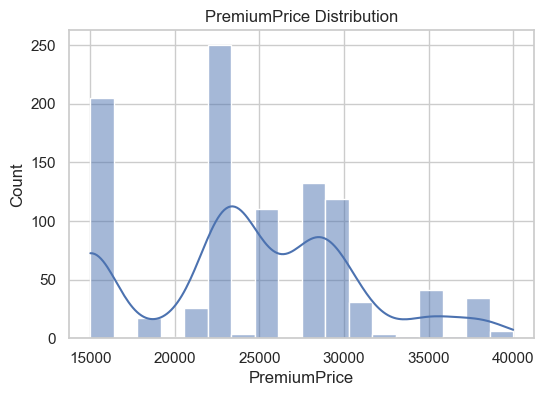

In [256]:
# Set up visualization style
sns.set(style="whitegrid")

# Plotting histograms for key numerical variables
numeric_cols = ['Age', 'Height', 'Weight', 'PremiumPrice']
#"Distribution of numerical Variables"

for var in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[var], kde=True)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


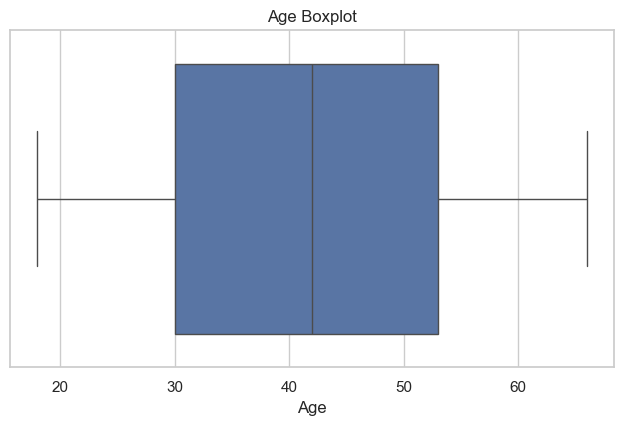

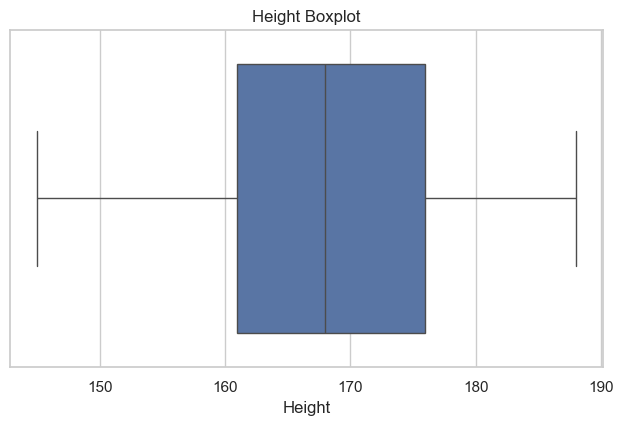

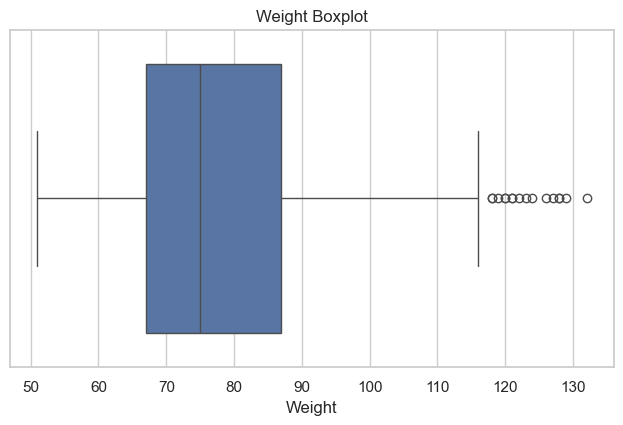

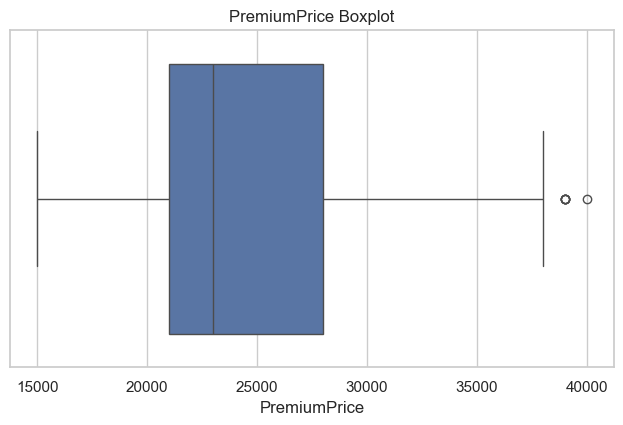

In [257]:
# Boxplots for the same variables

#fig.suptitle("Boxplots of Key Variables")

for var in numeric_cols:
    sns.boxplot(x=data[var])
    plt.title(f'{var} Boxplot')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


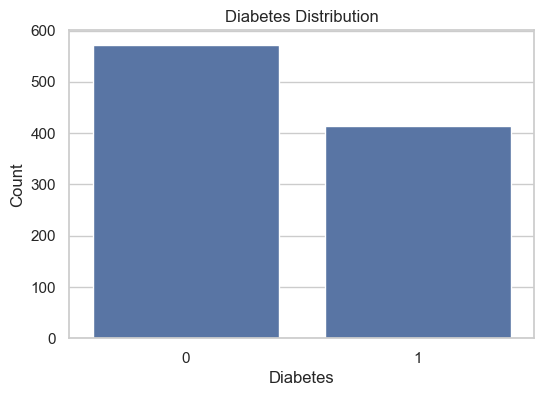

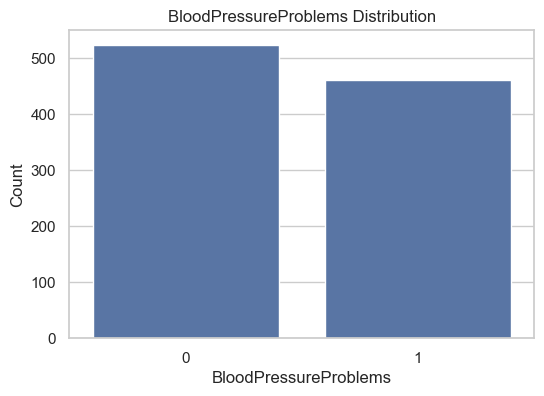

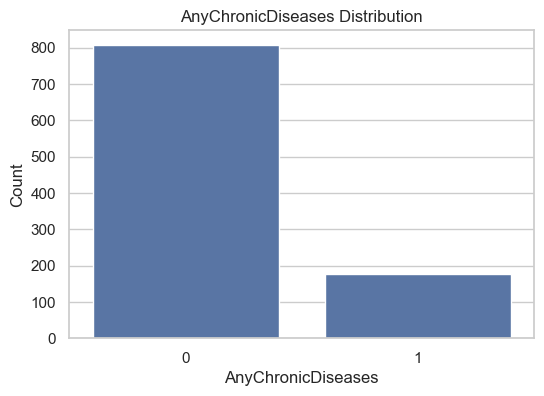

In [258]:
# List of categorical variables to plot
categorical_vars = ['Diabetes', 'BloodPressureProblems', 'AnyChronicDiseases']

# Loop through each categorical variable and plot it individually
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[var])
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Count')
    




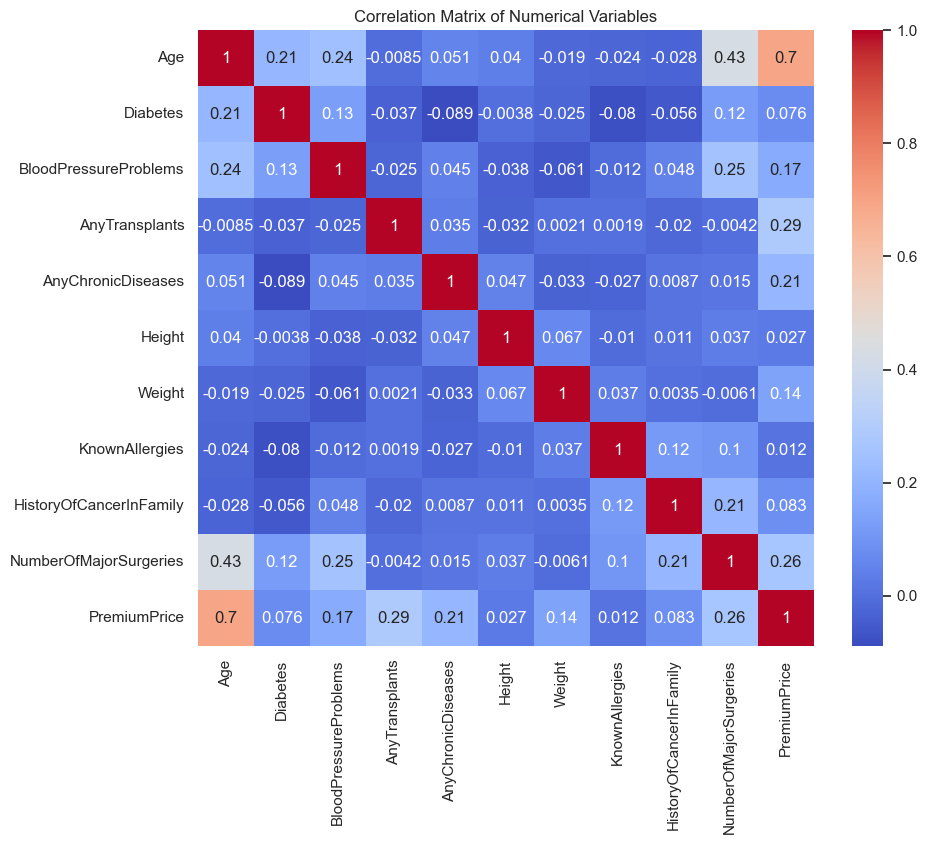

In [259]:
# Generate a correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


Outlier detection

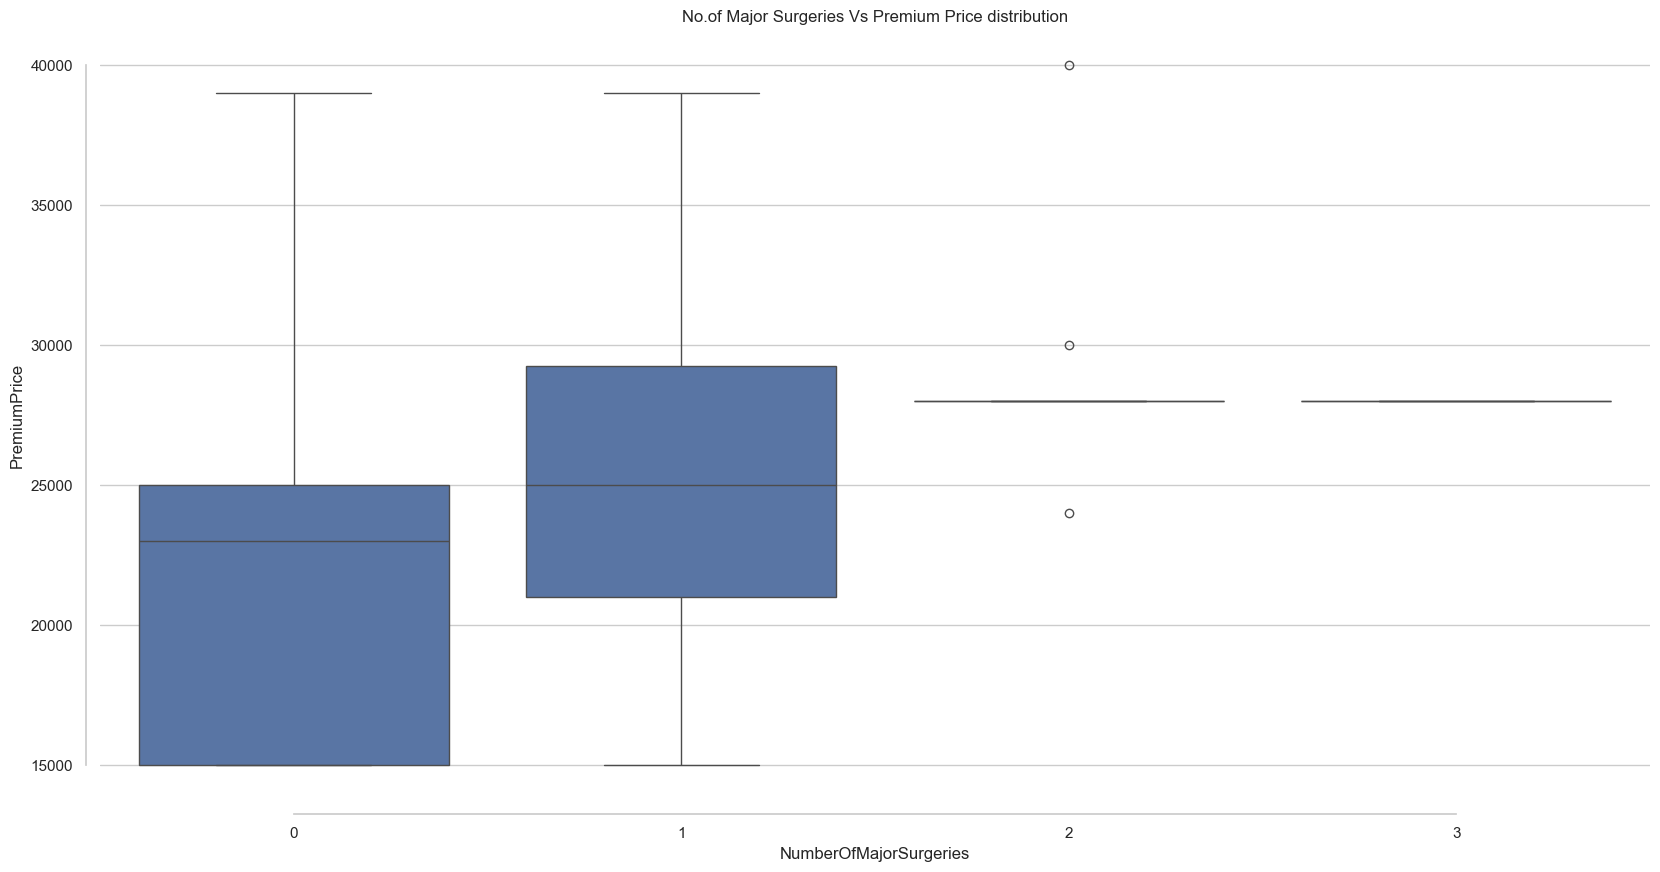

In [261]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.boxplot(x="NumberOfMajorSurgeries", y="PremiumPrice",
            data=data)
sns.despine(offset=10, trim=True)
plt.title("No.of Major Surgeries Vs Premium Price distribution")
plt.show()

Outliers in PremiumPrice:      Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
204   27         0                      1               0                   0   
295   64         1                      1               0                   1   
926   24         0                      1               0                   0   
928   19         0                      0               0                   0   
976   21         0                      1               0                   0   
984   47         1                      1               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
204     159     120               1                        1   
295     163      91               0                        0   
926     159      67               0                        0   
928     171      67               0                        0   
976     155      74               0                        0   
984     158      73   

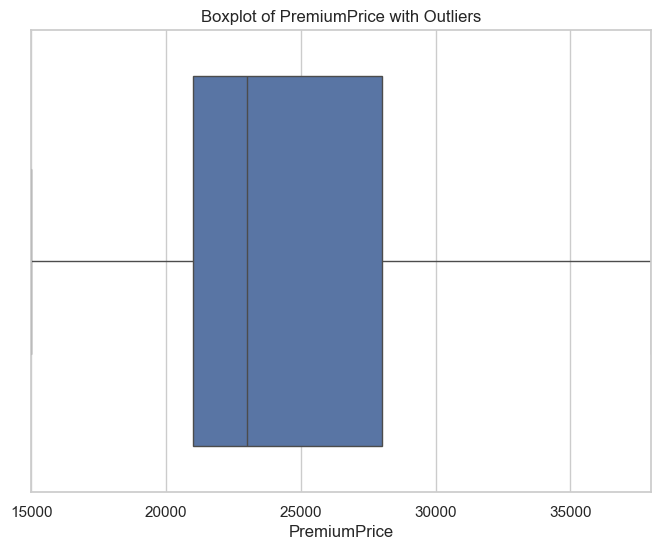

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers in PremiumPrice
outliers_premium = detect_outliers(data, 'PremiumPrice')
print("Outliers in PremiumPrice:", outliers_premium)

# Visualizing PremiumPrice with outliers, with x-axis limits to prevent oversized plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=data['PremiumPrice'])
plt.xlim(data['PremiumPrice'].quantile(0.01), data['PremiumPrice'].quantile(0.99))  # Limit the x-axis range
plt.title("Boxplot of PremiumPrice with Outliers")

# Adding labels for each outlier point
for outlier in outliers_premium['PremiumPrice']:
    if outlier < data['PremiumPrice'].quantile(0.99):  # Filter to display only reasonable values
        plt.text(1, outlier, f'{outlier:.2f}', color='red', ha='center', va='baseline')

plt.show()


#Hypothesis testing

In [264]:
from scipy.stats import ttest_ind
#HO: Person having Chronic disease does not make any impact in premium price
#Ha: Person having Chronic disease is directly impacting the  premium price

group1 = data[data['AnyChronicDiseases'] == 1]['PremiumPrice']
group2 = data[data['AnyChronicDiseases'] == 0]['PremiumPrice']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for Chronic Diseases effect on Premium:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Person having Chronic disease is directly impacting the  premium price")
else:
    print("Person having Chronic disease does not impact in premium price")

T-test for Chronic Diseases effect on Premium: T-statistic: 7.707663368460665 P-value: 1.7279736467737666e-13
Person having Chronic disease is directly impacting the  premium price


In [265]:
#HO: Person having Diabetes  does not make any impact in premium price
#Ha: Person having Diabetes is directly impacting the  premium price
group1 = data[data['Diabetes'] == 1]['PremiumPrice']
group2 = data[data['Diabetes'] == 0]['PremiumPrice']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for Diabetes effect on Premium:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Person having Diabetes is directly impacting the  premium price")
else:
    print("Person having Diabetes does not impact in premium price")

T-test for Diabetes effect on Premium: T-statistic: 2.4489285982890396 P-value: 0.014508142994631809
Person having Diabetes is directly impacting the  premium price


In [266]:
#HO: Person having blood pressure problems  does not make any impact in premium price
#Ha: Person having blood pressure problems is directly impacting the  premium price
group1 = data[data['BloodPressureProblems'] == 1]['PremiumPrice']
group2 = data[data['BloodPressureProblems'] == 0]['PremiumPrice']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for Blood pressure problems effect on Premium:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Person having blood pressure problems is directly impacting the  premium price")
else:
    print("Person having blood pressure problems does not impact in premium price")

T-test for Blood pressure problems effect on Premium: T-statistic: 5.370281271166068 P-value: 9.813498313247295e-08
Person having blood pressure problems is directly impacting the  premium price


In [267]:
#HO: Person having any transplants  does not make any impact in premium price
#Ha: Person having any transplants is directly impacting the  premium price
group1 = data[data['AnyTransplants'] == 1]['PremiumPrice']
group2 = data[data['AnyTransplants'] == 0]['PremiumPrice']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for transplants effect on Premium:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Person having any transplants is directly impacting the  premium price")
else:
    print("Person having any transplants does not impact in premium price")

T-test for transplants effect on Premium: T-statistic: 6.2599390386040215 P-value: 5.544902737541748e-08
Person having any transplants is directly impacting the  premium price


In [268]:
#HO: Person having allergies  does not make any impact in premium price
#Ha: Person having allergies is directly impacting the  premium price
group1 = data[data['KnownAllergies'] == 1]['PremiumPrice']
group2 = data[data['KnownAllergies'] == 0]['PremiumPrice']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for knownallergies effect on Premium:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Person having allergies is directly impacting the  premium price")
else:
    print("Person having allergies does not impact in premium price")

T-test for knownallergies effect on Premium: T-statistic: 0.36668963110854214 P-value: 0.7140924633237387
Person having allergies does not impact in premium price


In [269]:
#HO: Person who is having history of cancer in their family does not make any impact in premium price
#Ha: Person who is having history of cancer in their family is directly impacting the  premium price
group1 = data[data['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
group2 = data[data['HistoryOfCancerInFamily'] == 0]['PremiumPrice']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for Chronic Diseases effect on Premium:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Person who is having history of cancer in their family is directly impacting the  premium price")
else:
    print("Person who is having history of cancer in their family does not make any impact in premium price")

T-test for Chronic Diseases effect on Premium: T-statistic: 2.3567519547641984 P-value: 0.01982822652964323
Person who is having history of cancer in their family is directly impacting the  premium price


In [270]:
#HO: Age is not best feature in deciding the person who is having diabetes
#Ha: Age is the best feature in deciding the person who is having diabetes

group1 = data[data['Diabetes'] == 1]['Age'] 
group2 = data[data['Diabetes'] == 0]['Age']

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print("T-test for Age by Diabetes:", "T-statistic:", t_stat, "P-value:", p_val)
if p_val < 0.05:
    print("Age is the best feature in deciding the person who is having diabetes")
else:
    print("Age is not best feature in deciding the person who is having diabetes")

T-test for Age by Diabetes: T-statistic: 6.732163398356572 P-value: 3.0278917843270774e-11
Age is the best feature in deciding the person who is having diabetes


In [271]:
from scipy.stats import f_oneway

# ANOVA test for different counts of major surgeries

#HO: Person who had major surgeries that does not make any impact in premium price
#Ha: Person who had major surgeries is directly impacting the  premium price
anova_result = f_oneway(
    data[data['NumberOfMajorSurgeries'] == 0]['PremiumPrice'],
    data[data['NumberOfMajorSurgeries'] == 1]['PremiumPrice'],
    data[data['NumberOfMajorSurgeries'] == 2]['PremiumPrice']
)
print("ANOVA result for Major Surgeries effect on Premium:", anova_result)
if p_val < 0.05:
    print("Person who had major surgeries is directly impacting the  premium price")
else:
    print("Person who had major surgeries that does not make any impact in premium price") 


ANOVA result for Major Surgeries effect on Premium: F_onewayResult(statistic=35.64093426091827, pvalue=1.1621633318361831e-15)
Person who had major surgeries is directly impacting the  premium price


In [272]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['AnyChronicDiseases'], data['HistoryOfCancerInFamily'])

#H0:A person who is having chronic disease does not require he/she should have a history of cancer in their family.
#Ha:A person who is having chronic disease is highly related because he/she had a history of cancer in their family.
# Perform the Chi-square test

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print("Chi-square test:", "Chi-square Statistic:", chi2_stat, "P-value:", p_val)
if p_val < 0.05:
    print("A person who is having chronic disease is highly related because he/she had a history of cancer in their family.")
else:
    print("A person who is having chronic disease does not require he/she should have a history of cancer in their family.") 

Chi-square test: Chi-square Statistic: 0.02062393388215223 P-value: 0.8858081638149811
A person who is having chronic disease does not require he/she should have a history of cancer in their family.


In [273]:
# Create a contingency table
contingency_table = pd.crosstab(data['AnyTransplants'], data['Diabetes'])

#H0:A person who is having any transplants does not require he/she should have diabetes.
#Ha:A person who is having any transplants is highly related because he/she had a diabetes.

# Perform the Chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print("Chi-square test:", "Chi-square Statistic:", chi2_stat, "P-value:", p_val)
if p_val < 0.05:
    print("A person who is having any transplants is highly related because he/she had a diabetes.")
else:
    print("A person who is having any transplants does not require he/she should have diabetes.")

Chi-square test: Chi-square Statistic: 1.0207290599382488 P-value: 0.3123461364949182
A person who is having any transplants does not require he/she should have diabetes.


In [274]:
# Create a contingency table
contingency_table = pd.crosstab(data['KnownAllergies'], data['NumberOfMajorSurgeries'])
#H0:A person who is having Allergies does not require he/she should had a major surgeries
#Ha:A person who is having Allergies is highly related because he/she had a major surgeries
# Perform the Chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print("Chi-square test:", "Chi-square Statistic:", chi2_stat, "P-value:", p_val)
if p_val < 0.05:
    print("A person who is having Allergies is highly related because he/she had a major surgeries")
else:
    print("A person who is having Allergies does not require he/she should had a major surgeries") 

Chi-square test: Chi-square Statistic: 109.30170166278893 P-value: 1.5509963903476643e-23
A person who is having Allergies is highly related because he/she had a major surgeries


In [275]:
from scipy.stats import pearsonr
#H0: Age is not best feature in deciding premium price
#Ha: Age is best feature in deciding premium price
# Pearson correlation between Age and PremiumPrice
correlation, p_value = pearsonr(data['Age'], data['PremiumPrice'])
print("Pearson correlation between Age and PremiumPrice:", "Correlation Coefficient:", correlation, "P-value:", p_value)
if p_val < 0.05:
    print("Age is best feature in deciding premium price")
else:
    print("Age is not best feature in deciding premium price") 

Pearson correlation between Age and PremiumPrice: Correlation Coefficient: 0.6975399655058029 P-value: 1.322507157832166e-144
Age is best feature in deciding premium price


ML MODELING

In [277]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Impute missing values if needed (examples shown here for numerical and categorical handling)
from sklearn.impute import SimpleImputer

# For numerical features: using mean imputation as an example
num_imputer = SimpleImputer(strategy='mean')
data[['Age', 'Height', 'Weight', 'PremiumPrice']] = num_imputer.fit_transform(data[['Age', 'Height', 'Weight', 'PremiumPrice']])

# For categorical features (if applicable): using most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
data[['Diabetes', 'BloodPressureProblems']] = cat_imputer.fit_transform(data[['Diabetes', 'BloodPressureProblems']])


Missing values per column:
 Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


In [278]:
# Create BMI feature
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

# Example for Age Categories (customize as needed)
data['AgeCategory'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young Adult', 'Middle Age', 'Senior'])

# Example for Health Risk Score
data['HealthRiskScore'] = data[['Diabetes', 'BloodPressureProblems', 'AnyChronicDiseases']].sum(axis=1)


In [279]:
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeCategory,HealthRiskScore
0,45.0,0,0,0,0,155.0,57.0,0,0,0,25000.0,23.725286,Middle Age,0
1,60.0,1,0,0,0,180.0,73.0,0,0,0,29000.0,22.530864,Senior,1
2,36.0,1,1,0,0,158.0,59.0,0,0,1,23000.0,23.634033,Middle Age,2
3,52.0,1,1,0,1,183.0,93.0,0,0,2,28000.0,27.770313,Senior,3
4,38.0,0,0,0,1,166.0,88.0,0,0,1,23000.0,31.934969,Middle Age,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18.0,0,0,0,0,169.0,67.0,0,0,0,15000.0,23.458562,Young Adult,0
982,64.0,1,1,0,0,153.0,70.0,0,0,3,28000.0,29.903029,Senior,2
983,56.0,0,1,0,0,155.0,71.0,0,0,1,29000.0,29.552549,Senior,1
984,47.0,1,1,0,0,158.0,73.0,1,0,1,39000.0,29.242109,Middle Age,2


In [280]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'HealthRiskScore']
categorical_features = ['AgeCategory']

# Scaling for numerical features
scaler = StandardScaler()

# Encoding for categorical features
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', encoder, categorical_features)
    ])

# Apply preprocessing
processed_data = preprocessor.fit_transform(data)


In [281]:
processed_data

array([[ 0.23319694, -1.30610453, -1.39924954, ..., -1.2897582 ,
         0.        ,  0.        ],
       [ 1.30798124,  1.17085167, -0.27706151, ..., -0.08321021,
         1.        ,  0.        ],
       [-0.41167363, -1.00886978, -1.25897603, ...,  1.12333779,
         0.        ,  0.        ],
       ...,
       [ 1.02137209, -1.30610453, -0.41733501, ..., -0.08321021,
         1.        ,  0.        ],
       [ 0.37650152, -1.00886978, -0.27706151, ...,  1.12333779,
         0.        ,  0.        ],
       [-1.48645793, -1.00886978, -0.13678801, ..., -1.2897582 ,
         0.        ,  1.        ]])

#Starting with ML algorithms

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = processed_data
y = data['PremiumPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)


In [284]:
y_pred_linear

array([27251.3921713 , 24789.08239024, 30878.60032971, 17206.69372946,
       27775.16851549, 26678.84093764, 25216.61963997, 25172.87983804,
       28061.94536179, 28857.73868249, 23672.44828685, 27258.7598761 ,
       16914.6152792 , 18118.96640359, 25644.13768866, 28945.78419335,
       29354.05659216, 30114.95765441, 27842.48018386, 24462.53190795,
       26272.44511798, 14939.61795875, 25327.7176332 , 28362.58800071,
       24815.27779138, 27352.51167388, 25482.37695993, 26017.29131205,
       17214.52969131, 28620.87909104, 24335.95370268, 26493.31302513,
       16554.4227283 , 23970.4919287 , 15375.14884613, 32248.95261203,
       25420.5935729 , 24845.0081662 , 17824.39741768, 27369.94399498,
       26998.15298181, 25321.7069345 , 24118.99458969, 24341.6464564 ,
       16642.33304263, 26485.60492252, 26858.11399793, 25329.76724429,
       16425.03708727, 27189.41048527, 25758.99966729, 22505.84257657,
       26033.1384035 , 18162.7766934 , 26531.00058939, 24168.12091016,
      

In [285]:
linear_model.score(X_train, y_train)

0.5645919318371652

In [286]:
linear_model.score(X_test, y_test)

0.6446129874227898

In [287]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


In [288]:
dt_model.score(X_train, y_train)

1.0

In [289]:
dt_model.score(X_test, y_test)

0.2250635255609631

In [290]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [291]:
rf_model.score(X_train, y_train)

0.9344829584230752

In [292]:
rf_model.score(X_test, y_test)

0.6439870655497653

In [293]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

In [294]:
gb_model.score(X_train, y_train)

0.7748761921526919

In [295]:
gb_model.score(X_test, y_test)

0.6497891145681873

In [296]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cross-validation with Random Forest as an example
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("Cross-validated RMSE:", cv_rmse.mean())


Cross-validated RMSE: 4100.346634168607


In [297]:
# Evaluate on the test set for Random Forest
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 3896.329728543948
MAE: 2635.5050505050503
R²: 0.6439870655497653


The Decision Tree model has achieved a perfect training score of 1.0, which indicates overfitting (the model is learning the training data too well but generalizing poorly on unseen data). To improve the model’s performance on the test set, we can try the following strategies:

Pruning the Tree: Limit the depth of the tree or the minimum number of samples required to split a node. This helps in reducing overfitting.

Switching to an Ensemble Model: Use ensemble methods like Random Forests or Gradient Boosting, which tend to generalize better by averaging multiple trees.

Hyperparameter Tuning: Use cross-validation to find the optimal parameters, such as max_depth, min_samples_split, and min_samples_leaf.

In [299]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (using degree 2 to avoid excessive feature explosion)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the new polynomial data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a new Linear Regression model on polynomial features
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train_poly)

# Evaluate the model
train_score_poly = linear_model_poly.score(X_train_poly, y_train_poly)
test_score_poly = linear_model_poly.score(X_test_poly, y_test_poly)

print("Training score with polynomial features:", train_score_poly)
print("Testing score with polynomial features:", test_score_poly)


Training score with polynomial features: 0.6009020745569207
Testing score with polynomial features: 0.6479485549544518


In [300]:
from sklearn.feature_selection import RFE

# Initialize linear regression model for RFE
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=10)  # Adjust number of features as necessary
X_rfe = rfe.fit_transform(X, y)

# Train-test split with selected features
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on selected features
linear_model_rfe = LinearRegression()
linear_model_rfe.fit(X_train_rfe, y_train_rfe)

# Evaluate the model
train_score_rfe = linear_model_rfe.score(X_train_rfe, y_train_rfe)
test_score_rfe = linear_model_rfe.score(X_test_rfe, y_test_rfe)

print("Training score with RFE:", train_score_rfe)
print("Testing score with RFE:", test_score_rfe)


Training score with RFE: 0.5645919318371652
Testing score with RFE: 0.6446129874227898


In [301]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for stronger regularization if needed
ridge_model.fit(X_train, y_train)
train_score_ridge = ridge_model.score(X_train, y_train)
test_score_ridge = ridge_model.score(X_test, y_test)

print("Training score with Ridge:", train_score_ridge)
print("Testing score with Ridge:", test_score_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso_model.fit(X_train, y_train)
train_score_lasso = lasso_model.score(X_train, y_train)
test_score_lasso = lasso_model.score(X_test, y_test)

print("Training score with Lasso:", train_score_lasso)
print("Testing score with Lasso:", test_score_lasso)


Training score with Ridge: 0.5645788988560632
Testing score with Ridge: 0.6440070137285605
Training score with Lasso: 0.5645919304652444
Testing score with Lasso: 0.6446130392929117


In [302]:
from sklearn.model_selection import GridSearchCV

# Example: Tune alpha for Ridge regression
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_cv.best_params_)
print("Best cross-validated score for Ridge:", ridge_cv.best_score_)


Best alpha for Ridge: {'alpha': 10.0}
Best cross-validated score for Ridge: 0.5568228315411


In [303]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 10, None],  # limit tree depth
    'min_samples_split': [2, 5, 10],  # minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10]  # minimum samples required at a leaf node
}

# Use GridSearchCV to find the best parameters for pruning
dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Train the best model from grid search on the full training set
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate the model
train_score_pruned = best_dt.score(X_train, y_train)
test_score_pruned = best_dt.score(X_test, y_test)

print("Training score after pruning:", train_score_pruned)
print("Testing score after pruning:", test_score_pruned)


Training score after pruning: 0.6023178875079103
Testing score after pruning: 0.647555549905716


In [304]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print("Training score with Random Forest:", train_score_rf)
print("Testing score with Random Forest:", test_score_rf)


Training score with Random Forest: 0.9115263704411238
Testing score with Random Forest: 0.6490511080893157


In [305]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting model
train_score_gb = gb_model.score(X_train, y_train)
test_score_gb = gb_model.score(X_test, y_test)

print("Training score with Gradient Boosting:", train_score_gb)
print("Testing score with Gradient Boosting:", test_score_gb)


Training score with Gradient Boosting: 0.7748761921526919
Testing score with Gradient Boosting: 0.6497891145681873


In [306]:
# Example parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search on Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, scoring='r2', cv=5)
rf_grid_search.fit(X_train, y_train)

# Evaluate the best Random Forest model
best_rf = rf_grid_search.best_estimator_
best_rf.fit(X_train, y_train)
Y_PRED_RF = best_rf.predict(X_test)
train_score_best_rf = best_rf.score(X_train, y_train)
test_score_best_rf = best_rf.score(X_test, y_test)

print("Best Random Forest Training score:", train_score_best_rf)
print("Best Random Forest Testing score:", test_score_best_rf)


Best Random Forest Training score: 0.6913884688457682
Best Random Forest Testing score: 0.6761545918585736


In [307]:
# Cross-validation with Random Forest as an example
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("Cross-validated RMSE:", cv_rmse.mean())


Cross-validated RMSE: 3885.778253550098


In [308]:
# Evaluate on the test set for Random Forest
rmse = np.sqrt(mean_squared_error(y_test, Y_PRED_RF))
mae = mean_absolute_error(y_test, Y_PRED_RF)
r2 = r2_score(y_test, Y_PRED_RF)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 3716.136735160474
MAE: 2511.179924856127
R²: 0.6761545918585736


In [366]:
file_name = 'cost_prediction'
pickle.dump(best_rf, open(file_name, 'wb'))

In [368]:
loaded_model = pickle.load(open(file_name, 'rb'))
loaded_model.predict(X_test)

array([28793.64160211, 24311.11653522, 29389.41428746, 16744.11108265,
       27222.70162548, 28743.09054731, 25848.71669613, 24170.51021796,
       28711.62666983, 28190.10210294, 23503.86428102, 26471.51647481,
       15355.13077788, 19339.61515426, 25886.3073651 , 31675.11206306,
       29132.72467364, 29243.28413868, 28888.10084082, 26929.65510966,
       26119.02551499, 15584.8490477 , 25371.18136056, 29896.93105677,
       23797.42075296, 28018.63447805, 26032.62854027, 25010.92475129,
       15073.94036078, 29851.79960683, 23971.72606561, 25360.5488877 ,
       16510.47643647, 24031.85010253, 15607.73184808, 31891.25511595,
       23860.19833846, 24764.00252045, 15325.509836  , 28255.48721264,
       27604.25353299, 24475.70426098, 24142.8400289 , 24030.3605216 ,
       23501.50636295, 26111.73671383, 28323.86656779, 25084.85170658,
       16072.74785288, 26504.55052029, 25728.60957177, 23589.85817719,
       25804.03518234, 17336.38181211, 26909.23513696, 24464.9310936 ,
      